<a href="https://colab.research.google.com/github/sharanyaa31/Training-datasets/blob/main/Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Walmart Store Sales Forecasting





In [9]:
# importing all the required libraries and modules
import numpy as np
import pandas as pd 
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Data Processing

In [11]:
train = pd.read_csv('/train.csv.zip')
test = pd.read_csv('/test.csv.zip')
stores = pd.read_csv('/stores.csv')
features = pd.read_csv('/features.csv.zip')

In [12]:
train.info()
stores.info()
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        ---------

In [6]:
df = train.merge(stores, how='left').merge(features, how='left')

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1208: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [13]:
test_merge = test.merge(stores, how='left').merge(features, how='left')

In [15]:
def split_date(df0):
    df0['Date'] = pd.to_datetime(df0['Date'])
    df0['Year'] = df0['Date'].dt.year
    df0['Month'] = df0['Date'].dt.month
    df0['Day'] = df0['Date'].dt.day
    df0['Week_of_year'] = df0['Date'].dt.isocalendar().week*1.0
    return df0.head(5)

In [16]:
split_date(df)
split_date(test_merge)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Week_of_year
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,2012,11,2,44.0
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,2012,11,9,45.0
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,2012,11,16,46.0
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,2012,11,23,47.0
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,2012,11,30,48.0


In [17]:
df.isnull().sum()

Store                 0
Dept                  0
Date                  0
Weekly_Sales          0
IsHoliday             0
Id               421497
Temperature           0
Fuel_Price            0
MarkDown1       6484291
MarkDown2       7099039
MarkDown3       6843070
MarkDown4       6730131
MarkDown5       6483540
CPI                   0
Unemployment          0
Year                  0
Month                 0
Day                   0
Week_of_year          0
dtype: int64


Exploratory data analysis

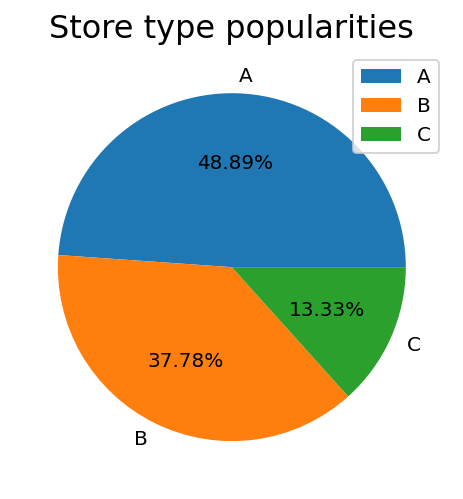

In [18]:
type_counts = stores.groupby('Type')['Store'].count().to_dict()
store_type = pd.DataFrame(list(type_counts.items()), columns=['Type', 'Counts'])
plt.pie(store_type.Counts, labels=store_type.Type, autopct='%.2f%%')
plt.title('Store type popularities', fontsize=16)
plt.legend(store_type.Type, loc='best')
plt.show()

In [28]:
type_sales =  df.groupby['Type']['Weekly_Sales'].mean().to_dict()
type_sales = pd.DataFrame(list(type_sales.items()), columns=['Type', 'AVG weekly_sales'])
plt.figure(figsize=(12,6), dpi=100)
plt.bar(type_sales.Type, type_sales['AVG weekly_sales'])
plt.title('Average weekly sales of store types', fontsize=16)
plt.xlabel('Store type')
plt.ylabel('Average weekly sale/$')
plt.show()

TypeError: ignored